# Geometric Relative Aceptance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Angular_Acceptance as aa
import Cartesian_Acceptance as ca
from tqdm import tqdm

In [ ]:
# --- Simulation and Detector Parameters ---
N_MUONS = int(5e7)
L = 58  # cm, Large of the detection plane
D = 70  # cm, Separation of each detection plane
N_planes = 3 # Number of detection planes
NUM_BINS = 58 # Bins for theta distribution and pixels NUM_BINS x NUM_BINS
n = 2 # cos^n Distribution 

theta_max = np.arctan(np.sqrt(2)*L / ( (N_planes-1) * D)) # Maximun Angle for counts

In [3]:
# --- Simulation ---
print("Starting Monte Carlo simulation...")
print(f"Simulating {N_MUONS:,} muons...")

x0, y0, theta, phi, accepted_mask = aa.generate_muons(N_MUONS, L, D, N_planes, n)
accepted_theta = theta[accepted_mask]

print(f"Simulation completed. Accepted muons: {len(accepted_theta):,}. Fraction of accepted muons: {len(accepted_theta)/N_MUONS:,}")


Starting Monte Carlo simulation...
Simulating 50,000,000 muons...


Simulating Trajectories: 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]


Simulation completed. Accepted muons: 11,808,266. Fraction of accepted muons: 0.23616532


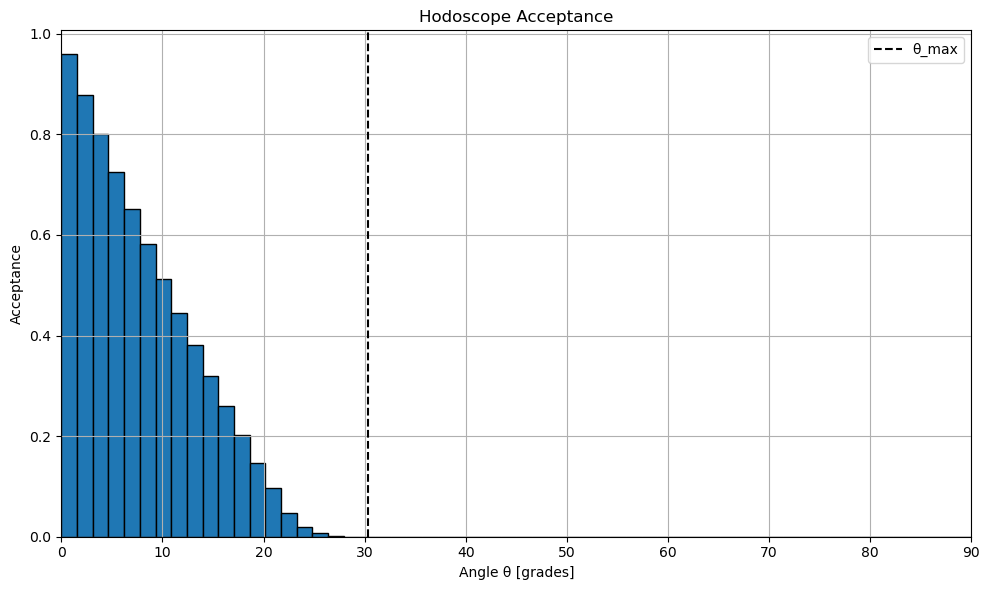

In [4]:
# --- Graphics ---
aa.plot_aceptance(theta, accepted_theta, theta_max, NUM_BINS)

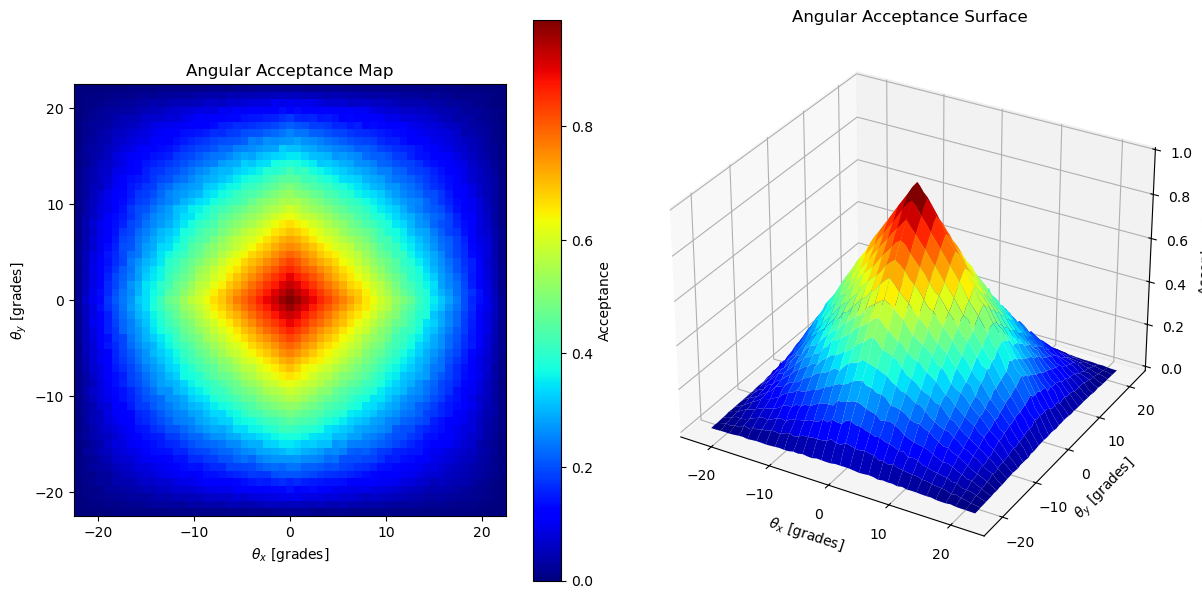

In [5]:
aa.plot_theta_xy(theta, phi, accepted_mask, N_planes, D, L, NUM_BINS)

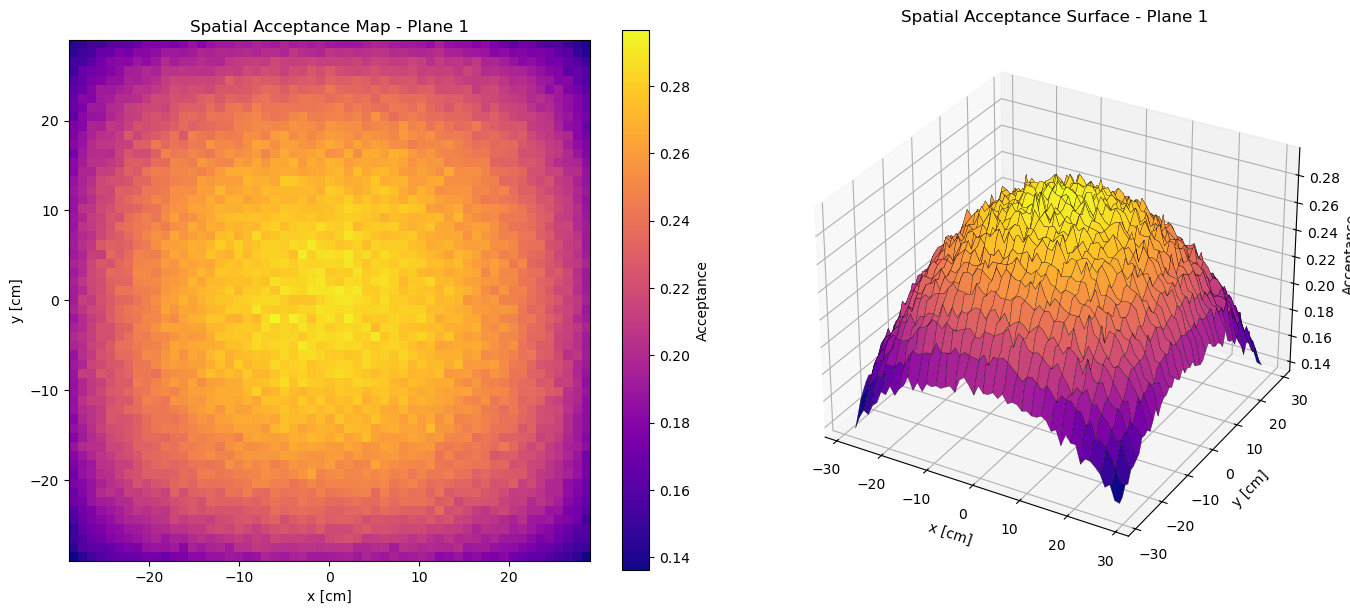

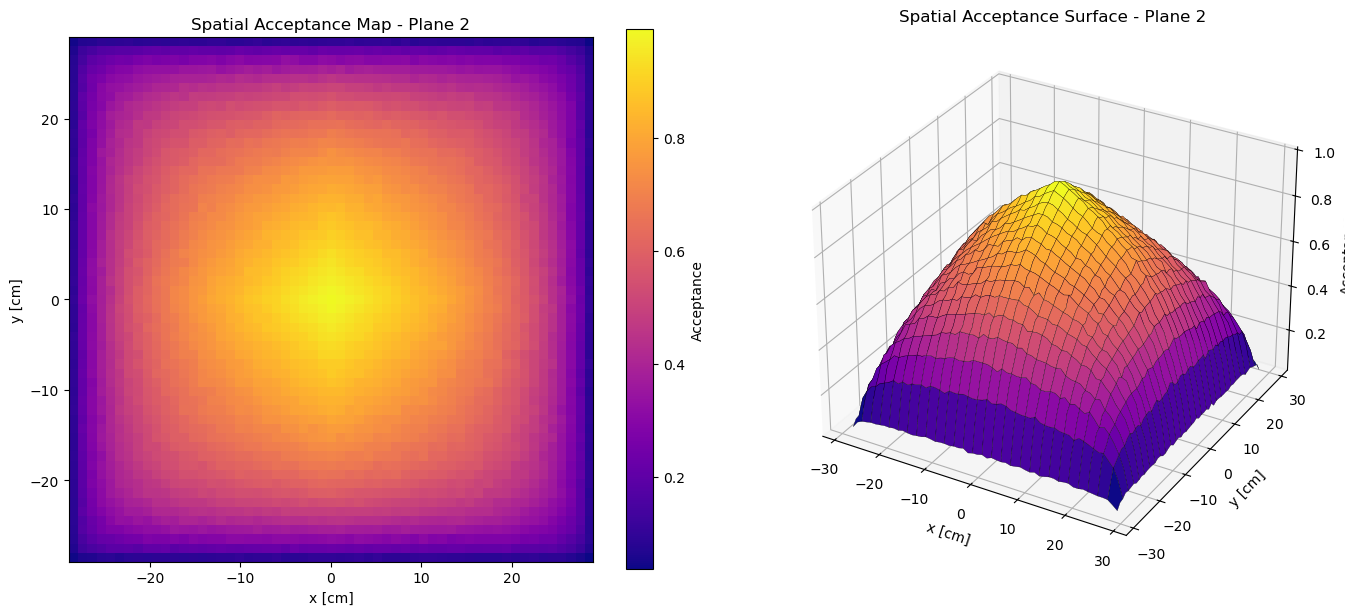

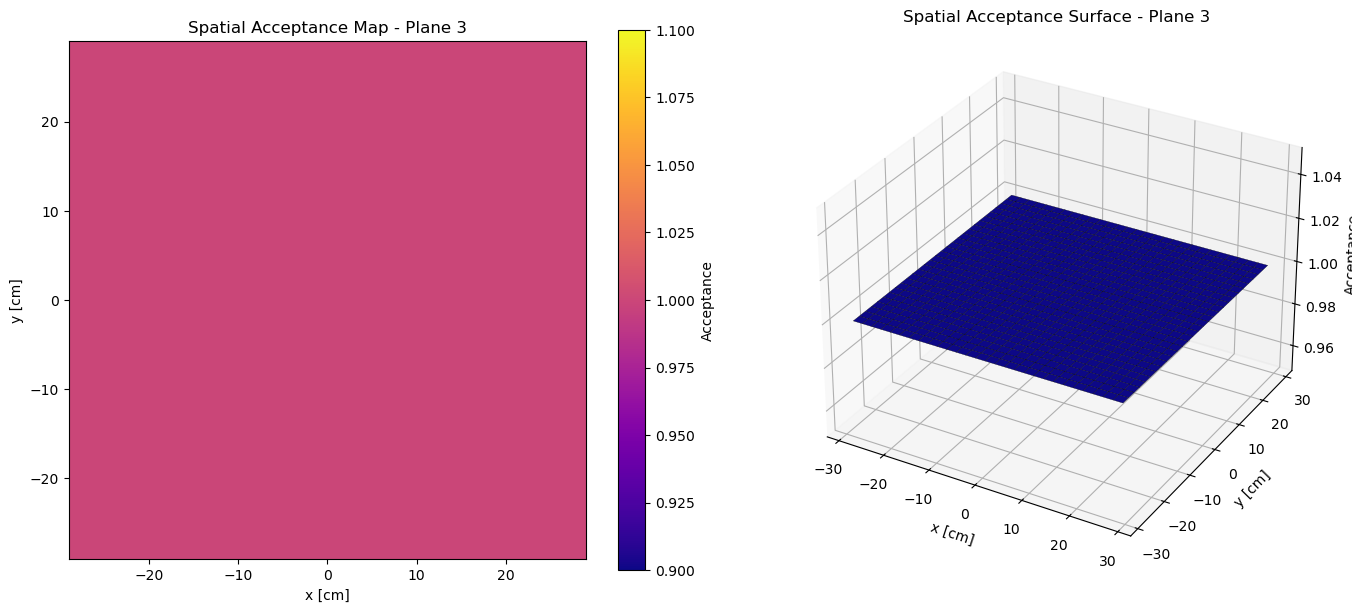

In [6]:
for i in range(N_planes):
    ca.plot_acceptance(x0, y0, theta, phi, accepted_mask, L, D, N_planes, i, NUM_BINS)